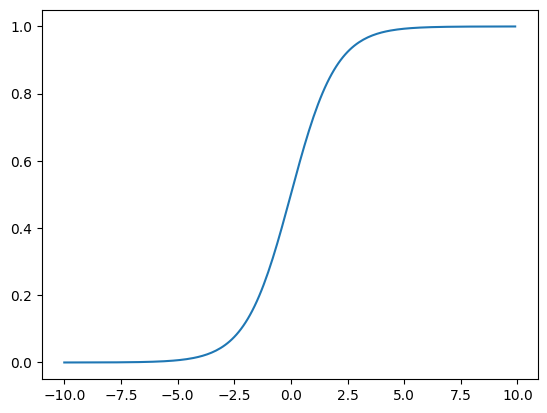

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x:np.ndarray)->np.ndarray:
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

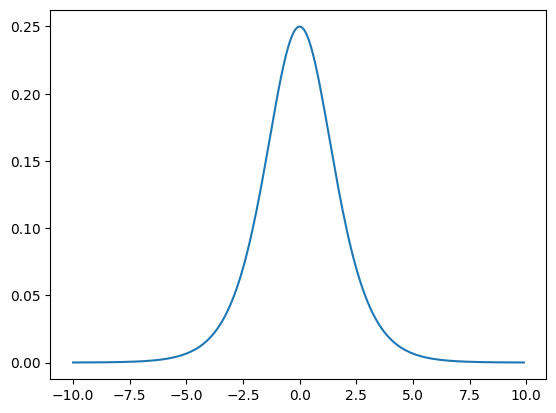

In [8]:
from typing import Callable

def derivative(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray, h: float = 1e-5) -> np.ndarray:
    return (func(x + h) - func(x - h)) / (2 * h)

dy = derivative(sigmoid, x)
plt.plot(x, dy)

In [6]:
import random
def nd_mul(a,b)->np.ndarray:
    assert a.shape[1] == b.shape[0], "Shapes must be the same for element-wise multiplication."
    return np.matmul(a, b)

a = np.random.random((3, 2))
b = np.random.random((2, 4))
print(nd_mul(a=a, b=b)) 

[[0.08496946 0.08144152 0.06046264 0.13817411]
 [0.09944643 0.09470568 0.12604074 0.313984  ]
 [0.24348142 0.23267563 0.23618572 0.56928812]]


In [14]:
def double_nested_backward(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray,w: np.ndarray,h: float = 1e-5) -> np.ndarray:
    
    assert x.shape[1] == w.shape[0], "Shapes must be the same for element-wise multiplication."

    mal = nd_mul(x, w)
    forward = func(mal)

    dfdmal = derivative(func, mal, h)
    dmaldx = np.transpose(w, (1,0))

    return np.dot(dfdmal, dmaldx)

x = np.random.random((5, 3))
w = np.random.random((3, 4))
dy = double_nested_backward(sigmoid, x, w)
print(dy)
    

[[0.35362188 0.50496006 0.55516065]
 [0.23648659 0.32951973 0.35400562]
 [0.37116631 0.53161169 0.58788268]
 [0.37801826 0.54133943 0.59527991]
 [0.31857273 0.45540712 0.50481464]]


In [57]:
def linear_forward(x: np.ndarray,w: dict[str,np.ndarray]) -> np.ndarray:
    assert x.shape[1] == w['weight'].shape[0], "Shapes must be the same for element-wise multiplication."
    if w.get('bias') is None or w['bias'].shape[0] == 0 or w['bias'].shape[0] > 1:
        raise ValueError("Bias must be a 1D array with a single element.")
    return nd_mul(x, w['weight']) + w['bias']

def loss_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    assert y_true.shape == y_pred.shape, "Shapes of true and predicted values must be the same."
    return np.mean((y_true - y_pred) ** 2)

def linear_backward(x: np.ndarray, w: dict[str,np.ndarray], y_true: np.ndarray, y_pred: np.ndarray) -> dict[str,np.ndarray]:
    assert x.shape[1] == w['weight'].shape[0], "Shapes must be the same for element-wise multiplication."
    assert y_true.shape == y_pred.shape, "Shapes of true and predicted values must be the same."

    m = y_true.shape[0]

    dloss_dypred = (-2/m) * (y_true - y_pred) 
    print("dloss_dypred shape:", dloss_dypred.shape)
    dypred_dbiasadd = np.ones_like(y_true)
    print("dypred_dbiasadd shape:", dypred_dbiasadd.shape)
    dbiasadd_dweight = np.transpose(x, (1,0))
    print("dbiasadd_dweight shape:", dbiasadd_dweight.shape)

    dloss_dbias = np.ones_like(w['bias'])

    weight_gradient = np.matmul(dbiasadd_dweight,(dloss_dypred * dypred_dbiasadd))
    print("Weight gradient shape:", weight_gradient.shape)
    bias_gradient = np.sum(dloss_dypred * dypred_dbiasadd, axis=0)

    return {'weight': weight_gradient, 'bias': bias_gradient}


def train_step(x: np.ndarray, w: dict[str,np.ndarray], y_true: np.ndarray, learning_rate: float) -> dict[str,np.ndarray]:
    y_pred = linear_forward(x, w)
    loss = loss_mse(y_true, y_pred)
    gradients = linear_backward(x, w, y_true, y_pred)

    w['weight'] -= learning_rate * gradients['weight']
    w['bias'] -= learning_rate * gradients['bias']

    return w

def train(x: np.ndarray, w: dict[str,np.ndarray], y_true: np.ndarray, learning_rate: float, epochs: int) -> dict[str,np.ndarray]:
    for epoch in range(epochs):
        w = train_step(x, w, y_true, learning_rate)
    return w


In [58]:
x = np.random.random((100, 3))
y = np.matmul(x, np.array([[2.0], [3.0], [4.0]])) + 5.0 
w = {
    'weight': np.random.random((3, 1)),
    'bias': np.random.random((1,))
}
print("Initial weights:", w)
print(x.shape, y.shape)

Initial weights: {'weight': array([[0.05079299],
       [0.24744017],
       [0.78715354]]), 'bias': array([0.78473929])}
(100, 3) (100, 1)


In [59]:
w = train(x, w, y, learning_rate=0.01, epochs=1000)

dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dypred shape: (100, 1)
dypred_dbiasadd shape: (100, 1)
dbiasadd_dweight shape: (3, 100)
Weight gradient shape: (3, 1)
dloss_dy

In [60]:
w

{'weight': array([[2.0568325 ],
        [2.9178604 ],
        [3.84494783]]),
 'bias': array([5.10164928])}